In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("clean_train.csv")
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_encoded,Age_categorized
0,0,0,3,male,22.0,1,0,7.2500,S,1,2,2
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,2
2,2,1,3,female,26.0,0,0,7.9250,S,0,2,2
3,3,1,1,female,35.0,1,0,53.1000,S,0,2,2
4,4,0,3,male,35.0,0,0,8.0500,S,1,2,2


In [2]:
df1 = df[["Pclass", "SibSp", "Parch","Sex_encoded", "Embarked_encoded", "Age_categorized", "Survived"]]

# Correlation using heatmap

In [3]:
sns.set(rc={'figure.figsize':(10, 10)})

<AxesSubplot:>

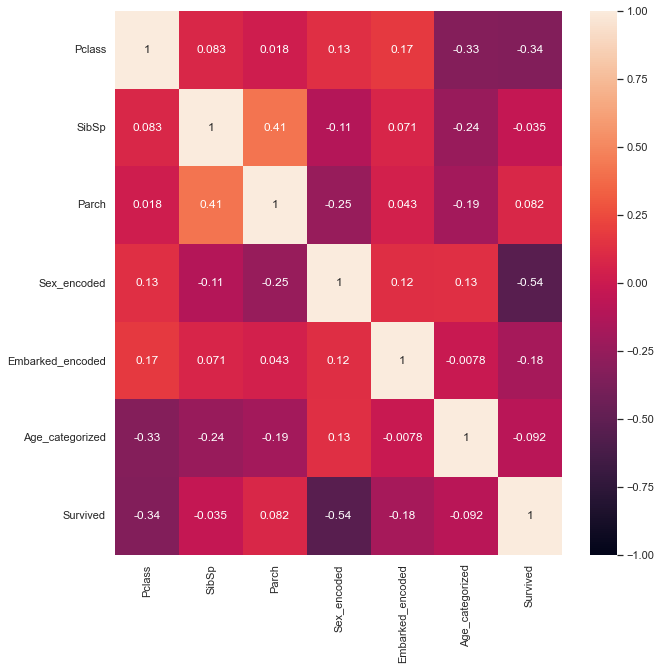

In [4]:
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1)

## Observations:

- ``Survival`` is moderately correlated to ``PClass``, ``Sex_encoded`` and slightly correlated to ``Embarked_encoded``. Surprisingly ``Age_categorized`` is not correlated to ``Survival`` at all.
- ``Age_encoded`` has some correlation with ``PClass`` and slight correlation with ``SibSp`` and ``Parch``.
- ``Sex_encoded`` has moderate correlation with ``Parch``.
- ``Parch`` has moderate correlation with ``SibSp``.

# Top 3 features

``Sex_encoded``, ``Age`` and ``Pclass`` are the top 3 features which decide if the passenger survives or not

In [5]:
df_survived = df[df["Survived"] == 1]
df_dead = df[df["Survived"] == 0]

df_survived_male = df_survived[df_survived["Sex_encoded"] == 1]
df_survived_female = df_survived[df_survived["Sex_encoded"] == 0]

df_dead_male = df_dead[df_dead["Sex_encoded"] == 1]
df_dead_female = df_dead[df_dead["Sex_encoded"] == 0]

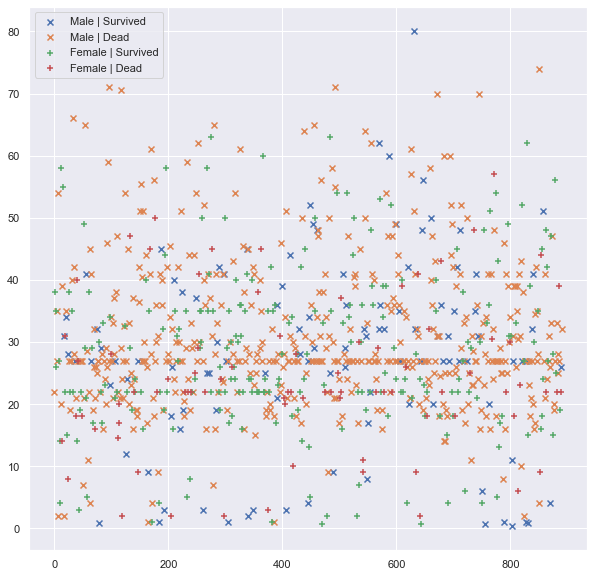

In [6]:
plt.scatter(df_survived_male.index, df_survived_male["Age"], marker="x", label="Male | Survived")
plt.scatter(df_dead_male.index, df_dead_male["Age"], marker="x", label="Male | Dead")
plt.scatter(df_survived_female.index, df_survived_female["Age"], marker="+", label="Female | Survived")
plt.scatter(df_dead_female.index, df_dead_female["Age"], marker="+", label="Female | Dead")
plt.legend()
plt.show()

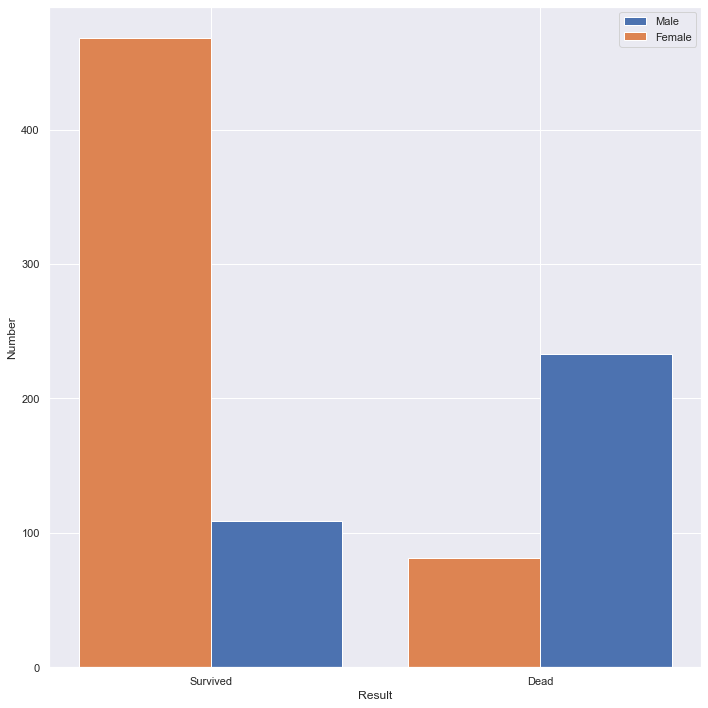

In [7]:
x = np.arange(1, 3)
y1 = [len(df_survived_male), len(df_survived_female)]
y2 = [len(df_dead_male), len(df_dead_female)]
plt.ylabel("Number")
plt.xlabel("Result")
width = 0.40
plt.xticks(x, ["Survived", "Dead"])
plt.bar(x+0.2, y1, width=0.40, label="Male")
plt.bar(x-0.2, y2, width=0.40, label="Female")
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
survived_second = [len(df_survived_male[df_survived_male["Pclass"] == 2]), len(df_survived_female[df_survived_female["Pclass"] == 2])]
survived_second

[17, 70]


survived_first: [45 91]
survived_second: [17 70]
survived_third: [47 72]

dead_first: [77  3]
dead_second: [91  6]
dead_third: [300  72]



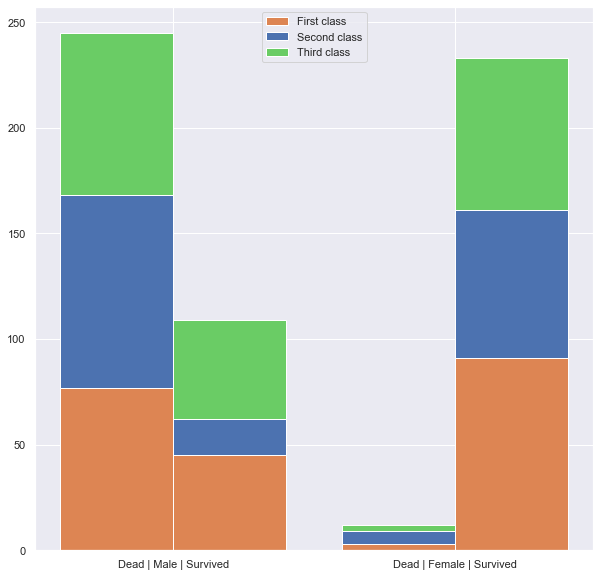

In [23]:
x = np.arange(1, 3)

survived_first = np.array([len(df_survived_male[df_survived_male["Pclass"] == 1]), len(df_survived_female[df_survived_female["Pclass"] == 1])])
survived_second = np.array([len(df_survived_male[df_survived_male["Pclass"] == 2]), len(df_survived_female[df_survived_female["Pclass"] == 2])])
survived_third = np.array([len(df_survived_male[df_survived_male["Pclass"] == 3]), len(df_survived_female[df_survived_female["Pclass"] == 3])])

dead_first = np.array([len(df_dead_male[df_dead_male["Pclass"] == 1]), len(df_dead_female[df_dead_female["Pclass"] == 1])])
dead_second = np.array([len(df_dead_male[df_dead_male["Pclass"] == 2]), len(df_dead_female[df_dead_female["Pclass"] == 2])])
dead_third = np.array([len(df_dead_male[df_dead_male["Pclass"] == 3]), len(df_dead_female[df_dead_female["Pclass"] == 3])])

width = 0.40

plt.bar(x+0.2, survived_first, width=width, color="#dd8553", label="First class")
plt.bar(x+0.2, survived_second, bottom=survived_first, width=width, color="#4c72b0", label="Second class")
plt.bar(x+0.2, survived_third, bottom=survived_first+survived_second, width=width, color="#6acc65", label="Third class")

plt.bar(x-0.2, dead_first, width=width, color="#dd8553")
plt.bar(x-0.2, dead_second, bottom=dead_first, width=width, color="#4c72b0")
plt.bar(x-0.2, dead_first, bottom=dead_first+dead_second, width=width, color="#6acc65")

print(f"""
survived_first: {survived_first}
survived_second: {survived_second}
survived_third: {survived_third}

dead_first: {dead_first}
dead_second: {dead_second}
dead_third: {dead_third}
""")

plt.xticks(x, ["Dead | Male | Survived", "Dead | Female | Survived"])

plt.legend()

plt.show()

/tmp/ipykernel_10105/2992967493.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  servival_sex_bar_ax.set_xticklabels(["", "", "Survived", "", "", "", "Dead"])


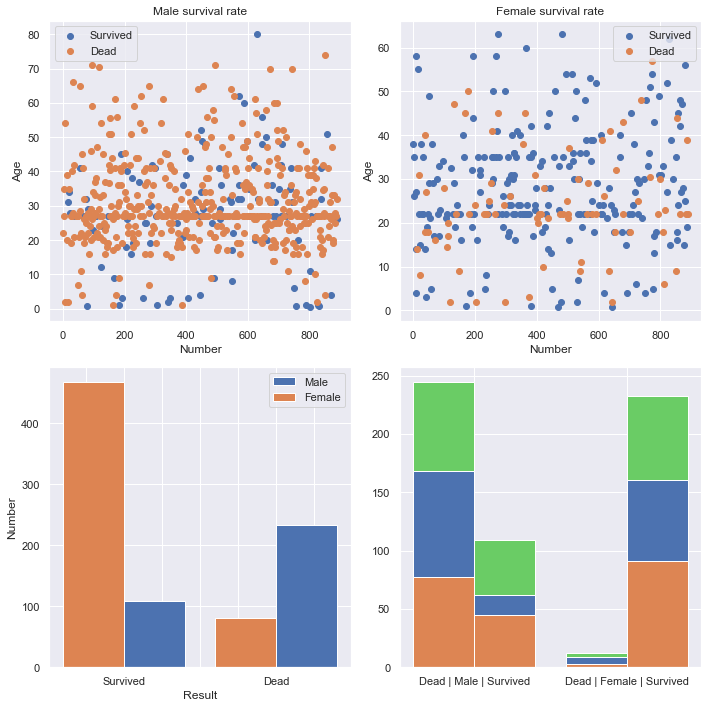

In [26]:
sex_fig, ((male_age_scatter_ax, female_age_scatter_ax), (servival_sex_bar_ax, scatter_cluster_bar_ax)) = plt.subplots(2, 2)

male_age_scatter_ax.scatter(df_survived_male.index, df_survived_male["Age"], label="Survived")
male_age_scatter_ax.scatter(df_dead_male.index, df_dead_male["Age"], label="Dead")
male_age_scatter_ax.legend()
male_age_scatter_ax.set_xlabel("Number")
male_age_scatter_ax.set_ylabel("Age")
male_age_scatter_ax.set_title("Male survival rate")

female_age_scatter_ax.scatter(df_survived_female.index, df_survived_female["Age"], label="Survived")
female_age_scatter_ax.scatter(df_dead_female.index, df_dead_female["Age"], label="Dead")
female_age_scatter_ax.legend()
female_age_scatter_ax.set_xlabel("Number")
female_age_scatter_ax.set_ylabel("Age")
female_age_scatter_ax.set_title("Female survival rate")

x = np.arange(1, 3)
y1 = [len(df_survived_male), len(df_survived_female)]
y2 = [len(df_dead_male), len(df_dead_female)]
servival_sex_bar_ax.set_ylabel("Number")
servival_sex_bar_ax.set_xlabel("Result")
width = 0.40
servival_sex_bar_ax.set_xticklabels(["", "", "Survived", "", "", "", "Dead"])
servival_sex_bar_ax.bar(x+0.2, y1, width=0.40, label="Male")
servival_sex_bar_ax.bar(x-0.2, y2, width=0.40, label="Female")
servival_sex_bar_ax.legend()

# scatter_cluster_bar_ax.scatter(df_survived_female.index, df_survived_female["Age"], label="Female | Survived")
# scatter_cluster_bar_ax.scatter(df_dead_female.index, df_dead_female["Age"], label="Female | Dead")
# scatter_cluster_bar_ax.set_title("scatter_cluster_bar_ax")

x = np.arange(1, 3)
survived_first = np.array([len(df_survived_male[df_survived_male["Pclass"] == 1]), len(df_survived_female[df_survived_female["Pclass"] == 1])])
survived_second = np.array([len(df_survived_male[df_survived_male["Pclass"] == 2]), len(df_survived_female[df_survived_female["Pclass"] == 2])])
survived_third = np.array([len(df_survived_male[df_survived_male["Pclass"] == 3]), len(df_survived_female[df_survived_female["Pclass"] == 3])])
dead_first = np.array([len(df_dead_male[df_dead_male["Pclass"] == 1]), len(df_dead_female[df_dead_female["Pclass"] == 1])])
dead_second = np.array([len(df_dead_male[df_dead_male["Pclass"] == 2]), len(df_dead_female[df_dead_female["Pclass"] == 2])])
dead_third = np.array([len(df_dead_male[df_dead_male["Pclass"] == 3]), len(df_dead_female[df_dead_female["Pclass"] == 3])])
width = 0.40
scatter_cluster_bar_ax.bar(x+0.2, survived_first, width=width, color="#dd8553", label="First class")
scatter_cluster_bar_ax.bar(x+0.2, survived_second, bottom=survived_first, width=width, color="#4c72b0", label="Second class")
scatter_cluster_bar_ax.bar(x+0.2, survived_third, bottom=survived_first+survived_second, width=width, color="#6acc65", label="Third class")
scatter_cluster_bar_ax.bar(x-0.2, dead_first, width=width, color="#dd8553")
scatter_cluster_bar_ax.bar(x-0.2, dead_second, bottom=dead_first, width=width, color="#4c72b0")
scatter_cluster_bar_ax.bar(x-0.2, dead_first, bottom=dead_first+dead_second, width=width, color="#6acc65")
scatter_cluster_bar_ax.set_xticks(x, ["Dead | Male | Survived", "Dead | Female | Survived"])

plt.tight_layout()

    Male [577] Passengers
    Female [314] Passengers

    Passengers [342] Survived
    Passengers [549] Dead

    Survived [109] Alive male
    Survived [233] Alive female

    Dead [468] Dead male
    Dead [81] Dead female

![](sankey.png)